# MNIST Classification with Transfer Learning (Final Notebook)

This notebook runs the complete pipeline using the updated script `mnist_transfer_learning_comparison.py`.

It will:
- Train LeNet-5 on MNIST
- Train transfer learning models (VGG16, ResNet50, MobileNet)
- Load local images `0.jpeg` and `1.jpeg`, preprocess and predict
- Compare results across models

## 1. Environment and Imports

In [ ]:
%pip -q install tensorflow matplotlib opencv-python --upgrade
import os, sys, pathlib
from IPython.display import display

# Get the current notebook's directory as the project directory
project_dir = pathlib.Path().absolute()
if str(project_dir) not in sys.path:
    sys.path.append(str(project_dir))
print('Project dir set to:', project_dir)

Note: you may need to restart the kernel to use updated packages.
Project dir set to: c:\Users\ed\Documents\maestria\deep_learning_2025-2\week2\WorkShop1_image_Classification



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Import pipeline functions from the script

In [ ]:
from mnist_transfer_learning_comparison import (
    load_and_prepare_mnist,
    create_lenet5_model,
    train_lenet5,
    train_transfer_learning_models,
    get_local_test_images,
    predict_external_images,
    compare_results
)
print('Functions imported from mnist_transfer_learning_comparison.py')

Functions imported from mnist_transfer_learning_comparison.py


## 3. Verify local test images (0.jpeg and 1.jpeg)

Checking c:\Users\ed\Documents\maestria\deep_learning_2025-2\week2\WorkShop1_image_Classification\0.jpeg -> True


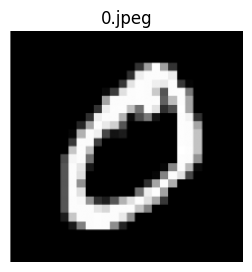

Checking c:\Users\ed\Documents\maestria\deep_learning_2025-2\week2\WorkShop1_image_Classification\1.jpeg -> True


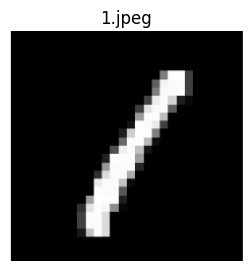

In [ ]:
import cv2, matplotlib.pyplot as plt
img_names = ['0.jpeg', '1.jpeg']
for name in img_names:
    path = project_dir / name
    print(f'Checking {path} ->', path.exists())
    if path.exists():
        img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
        plt.figure(figsize=(3,3))
        plt.imshow(img, cmap='gray')
        plt.title(name)
        plt.axis('off')
        plt.show()
    else:
        print('WARNING: Image not found. Place the file in:', project_dir)

## 4. Load MNIST and train LeNet-5

In [ ]:
(x_train, y_train, y_train_cat), (x_test, y_test, y_test_cat) = load_and_prepare_mnist()
lenet = create_lenet5_model()
lenet_history, lenet_acc = train_lenet5(lenet, x_train, y_train_cat, x_test, y_test_cat)
print(f'LeNet-5 accuracy: {lenet_acc:.4f}')

Loading MNIST data...


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Number of classes: 10
Creating LeNet-5 model...
Training LeNet-5 model...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6305 - loss: 1.2220 - val_accuracy: 0.8811 - val_loss: 0.3981
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9021 - loss: 0.3231 - val_accuracy: 0.9238 - val_loss: 0.2492
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9340 - loss: 0.2189 - val_accuracy: 0.9437 - val_loss: 0.1808
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9479 - loss: 0.1720 - val_accuracy: 0.9571 - val_loss: 0.1431
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9554 - loss: 0.1449 - val_accuracy: 0.9637 - val_loss: 0.1199
LeNet-5 Test Accuracy: 0.9637
LeNet-5 accuracy: 0.9637


## 5. Train transfer learning models (VGG16, ResNet50, MobileNet)

In [16]:
transfer_results = train_transfer_learning_models(x_train, y_train_cat, x_test, y_test_cat)
all_models = {'LeNet-5': {'model': lenet, 'test_accuracy': lenet_acc, 'history': lenet_history}}
all_models.update(transfer_results)
print('Transfer learning training completed.')

Training transfer learning models...

TRAINING MobileNet
Creating MobileNet transfer learning model...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.2408 - loss: 2.1326 - val_accuracy: 0.3963 - val_loss: 1.9269 - learning_rate: 1.0000e-04
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.3672 - loss: 1.8522 - val_accuracy: 0.4250 - val_loss: 1.7262 - learning_rate: 1.0000e-04
Epoch 3/10
606/938 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.3929 - loss: 1.7575

KeyboardInterrupt: 

## 6. Predict on local images 0.jpeg and 1.jpeg

Loading local test images...
Found test image: 0.jpeg (True label: 0)
Found test image: 1.jpeg (True label: 1)
Loaded 2 test images
Making predictions on external images...


Predictions using LeNet-5
Image: 0.jpeg
True label: 0, Predicted: 8, Confidence: 98.96%


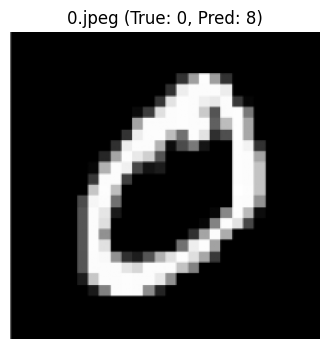

------------------------------------------------------------
Image: 1.jpeg
True label: 1, Predicted: 8, Confidence: 98.47%


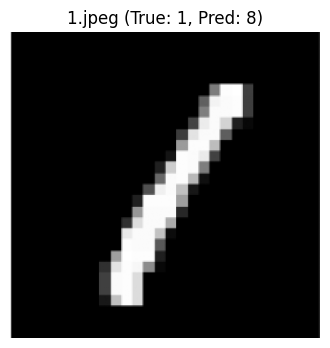

------------------------------------------------------------

Predictions using MobileNet
Image: 0.jpeg
True label: 0, Predicted: 0, Confidence: 34.98%


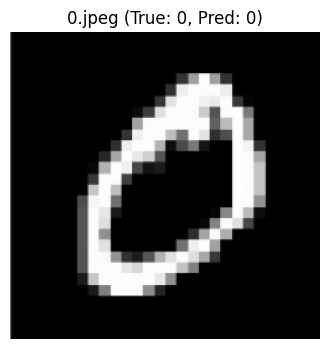

------------------------------------------------------------
Image: 1.jpeg
True label: 1, Predicted: 4, Confidence: 69.32%


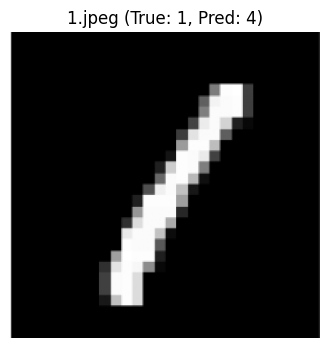

------------------------------------------------------------

Predictions using VGG16
Image: 0.jpeg
True label: 0, Predicted: 0, Confidence: 96.97%


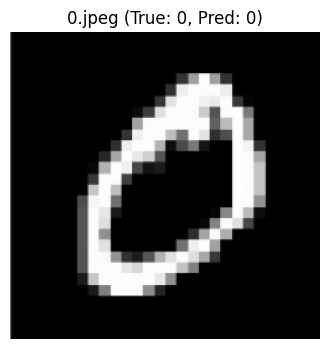

------------------------------------------------------------
Image: 1.jpeg
True label: 1, Predicted: 1, Confidence: 79.40%


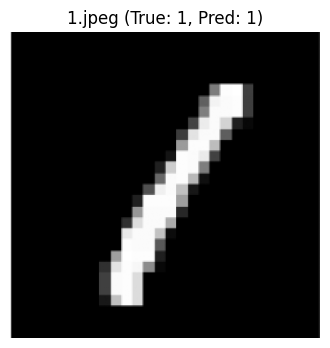

------------------------------------------------------------

Predictions using ResNet50
Image: 0.jpeg
True label: 0, Predicted: 0, Confidence: 99.92%


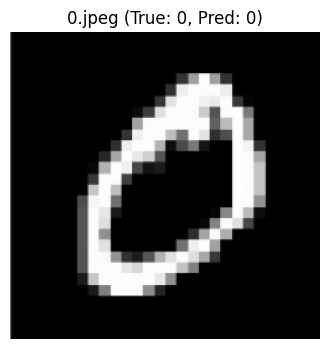

------------------------------------------------------------
Image: 1.jpeg
True label: 1, Predicted: 1, Confidence: 98.60%


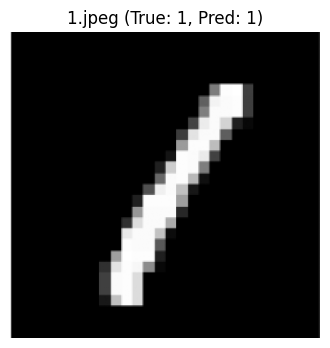

------------------------------------------------------------
Predictions completed.


In [ ]:
test_images = get_local_test_images()
if not test_images:
    print('No local images detected. Ensure 0.jpeg and 1.jpeg are in:', project_dir)
else:
    all_predictions = predict_external_images(all_models, test_images)
    print('Predictions completed.')

## 7. Compare results

In [17]:
compare_results(lenet_acc, transfer_results)
print('Done.')


COMPARISON RESULTS
LeNet-5 (Original):     0.9637
----------------------------------------
VGG16               : 0.9570 (Time: 3149.0s)
ResNet50            : 0.9262 (Time: 1583.5s)
MobileNet           : 0.4964 (Time: 427.3s)

CONCLUSIONS
1. Best performing model: VGG16 with 0.9570 accuracy
2. LeNet-5 outperformed transfer learning by 0.0067
3. Transfer learning observations:
   - VGG16: Simple architecture, good baseline
   - ResNet: Deep architecture with skip connections
   - MobileNet: Lightweight, good for mobile deployment
4. For MNIST digit classification:
   - Simple architectures like LeNet-5 are often sufficient
   - Transfer learning may be overkill for this simple task
   - Pre-trained models excel more on complex, natural image tasks
Done.
